In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
dataset_url = '/content/drive/MyDrive/VISKOM/dataset'
data_dir = pathlib.Path(dataset_url)

image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

Mounted at /content/drive
200


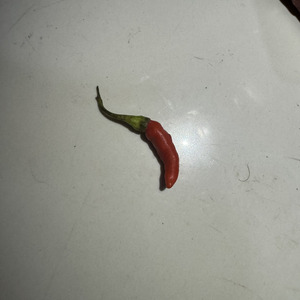

In [ ]:
merah = list(data_dir.glob('merah/*'))
PIL.Image.open(str(merah[0]))

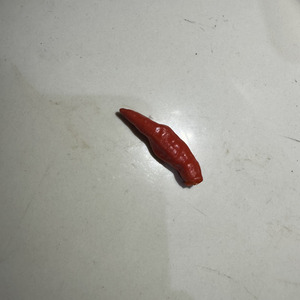

In [ ]:
PIL.Image.open(str(merah[1]))

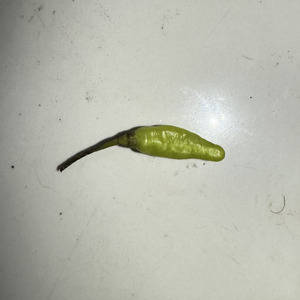

In [ ]:
hijau = list(data_dir.glob('hijau/*'))
PIL.Image.open(str(hijau[0]))

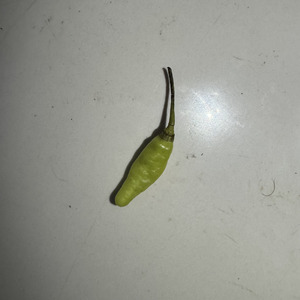

In [ ]:
PIL.Image.open(str(hijau[1]))

In [ ]:
batch_size = 64
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 200 files belonging to 2 classes.
Using 160 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['hijau', 'merah']


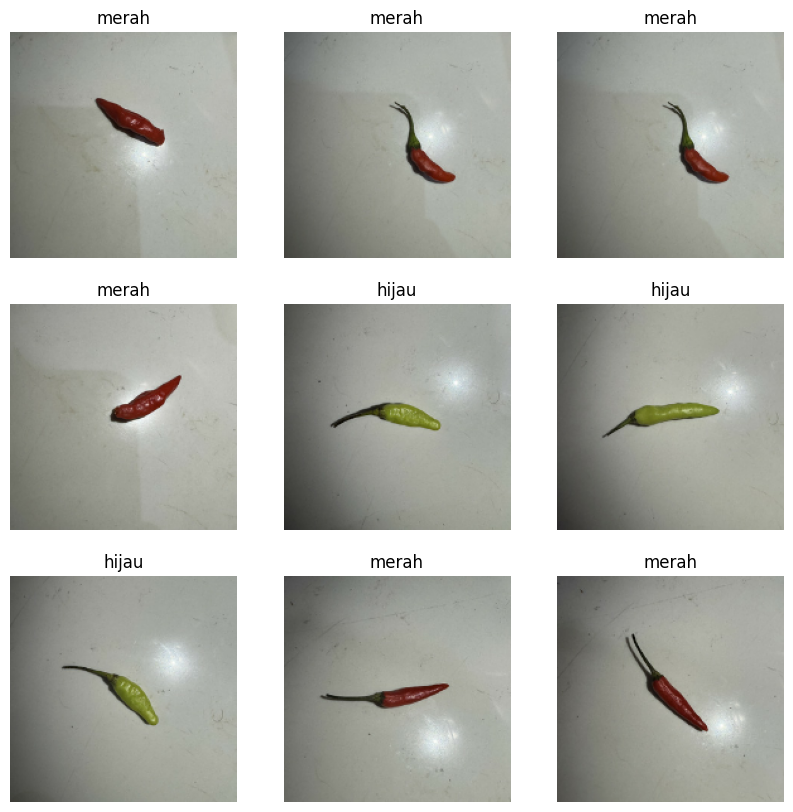

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'tf' is not defined

In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=180
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/180
3/3 [==============================] - 9s 3s/step - loss: 0.8304 - accuracy: 0.5000 - val_loss: 0.7625 - val_accuracy: 0.5000
Epoch 2/180
3/3 [==============================] - 5s 1s/step - loss: 0.7283 - accuracy: 0.5000 - val_loss: 0.6678 - val_accuracy: 0.5750
Epoch 3/180
3/3 [==============================] - 6s 2s/step - loss: 0.6531 - accuracy: 0.8000 - val_loss: 0.6226 - val_accuracy: 0.9250
Epoch 4/180
3/3 [==============================] - 5s 1s/step - loss: 0.5888 - accuracy: 0.9750 - val_loss: 0.5340 - val_accuracy: 0.8250
Epoch 5/180
3/3 [==============================] - 5s 1s/step - loss: 0.4364 - accuracy: 0.9500 - val_loss: 0.3515 - val_accuracy: 0.9500
Epoch 6/180
3/3 [==============================] - 7s 2s/step - loss: 0.2387 - accuracy: 0.9875 - val_loss: 0.1916 - val_accuracy: 0.9500
Epoch 7/180
3/3 [==============================] - 5s 2s/step - loss: 0.0938 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9750
Epoch 8/180
3/3 [=================

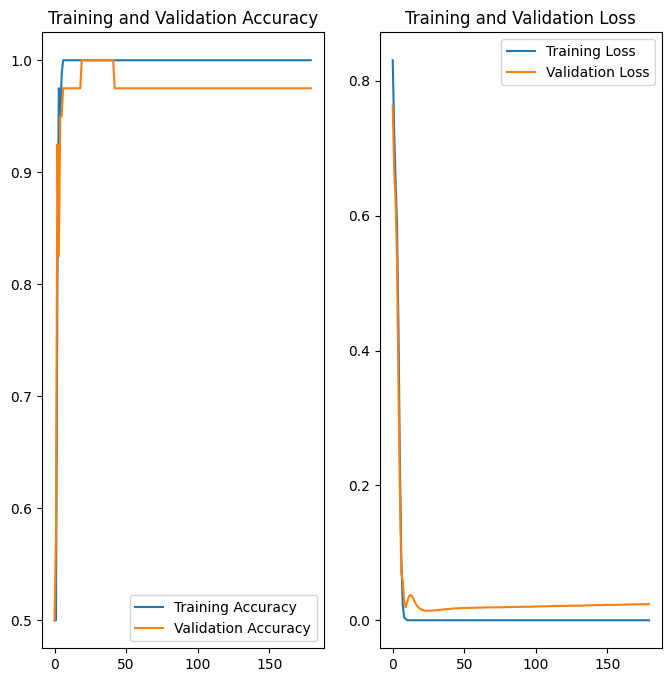

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_path = '/content/drive/MyDrive/VISKOM/test/merah/test.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to merah with a 100.00 percent confidence
